In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,f1_score
import math
from scipy.stats import mode
import matplotlib.pyplot as plt

In [179]:
mean_0 = np.genfromtxt('Datasets/DS1_m_0.txt',delimiter=',')
mean_1 = np.genfromtxt('Datasets/DS1_m_1.txt',delimiter=',')
Cov_M = np.genfromtxt('Datasets/DS1_Cov.txt',delimiter=',')
class_0 = np.random.multivariate_normal(mean_0, Cov_M, 2000)
class_1 = np.random.multivariate_normal(mean_1, Cov_M, 2000)
mean_0.shape

(20,)

In [3]:
# Add an extract column to all the sample
N = 2000
class_positive = np.c_[ class_1, np.ones(N) ]  
class_negative = np.c_[ class_0, np.zeros(N) ]  

In [4]:
class_positive.shape

(2000, 21)

In [5]:
size_1 = class_positive.shape[0]*6/10
size_0 = class_negative.shape[0]*6/10

In [6]:
training_1, validation_1, test_1 = class_positive[:int(size_1),:], class_positive[int(size_1):int(size_1)+400,:], class_positive[int(size_1)+400:,:]
training_0, validation_0, test_0 = class_negative[:int(size_0),:], class_negative[int(size_0):int(size_0)+400,:], class_negative[int(size_0)+400:,:]

# 1

In [7]:
DS1 = np.concatenate((class_positive, class_negative))
DS1_Train = np.concatenate((training_0,training_1))
DS1_val = np.concatenate((validation_0,validation_1))
DS1_Test = np.concatenate((test_0,test_1))
np.savetxt("DatasetsDS1/DS1_Test.csv", DS1_Test, delimiter=",")
np.savetxt("DatasetsDS1/DS1_Val.csv", DS1_val, delimiter=",")
np.savetxt("DatasetsDS1/DS1_Train.csv", DS1_Train, delimiter=",")
np.savetxt("DatasetsDS1/DS1.csv", DS1, delimiter=",")

In [8]:
DS1.shape, DS1_Train.shape, DS1_val.shape, DS1_Test.shape

((4000, 21), (2400, 21), (800, 21), (800, 21))

In [9]:
Train = np.genfromtxt('DatasetsDS1/DS1_Train.csv',delimiter=',')
Val = np.genfromtxt('DatasetsDS1/DS1_Val.csv',delimiter=',')
Test = np.genfromtxt('DatasetsDS1/DS1_Test.csv',delimiter=',')

In [66]:
def GDA_Parameter (train):
    W = []
    Train_X = Train[:,:20]
    Train_Y= Train[:,-1]
    condition = (Train_Y == 1.0)
    mu_1 = np.true_divide(Train_X[condition].sum(axis = 0), len(Train_X[condition]))
    mu_0 = np.true_divide(Train_X[~condition].sum(axis = 0), len(Train_X[~condition]))
    phi = len(Train_X[condition])/len(Train_X)
    sigma = np.true_divide((Train_X[condition] - mu_1).transpose().dot(Train_X[condition] - mu_1) + (Train_X[~condition] - mu_0).transpose().dot((Train_X[~condition] - mu_0)), len(Train_X))
    sigma_inv = np.linalg.pinv(sigma)
    W = -np.dot((mu_0 - mu_1).transpose(), sigma_inv)
    W_0 =  -(-0.5*(np.dot(mu_0, sigma_inv).dot(mu_0) - np.dot(mu_1, sigma_inv).dot(mu_1)) - np.log((1.0 -phi)/phi))
    return W, W_0, sigma, phi, mu_0, mu_1

In [68]:
Parameter_W, Parameter_W0, sigma, phi,mu_0, mu_1 = GDA_Parameter (Train)
Parameter_W, Parameter_W0, sigma, phi,mu_0, mu_1

(array([-14.51089977,   8.53301869,   5.31942223,   3.065962  ,
          9.79150056,   4.5956817 , -16.86631745,  24.22450509,
         29.12842965,  -9.31624337,  13.20600686,  12.03573062,
        -15.3430904 , -12.93508174,   5.69320012, -13.07862723,
        -29.29098078,   6.82786823,   0.41861648,   4.99543732]),
 -27.051553944107543,
 array([[8.22133136, 5.76825745, 6.56167549, 5.5789665 , 6.20271166,
         6.5062709 , 4.97206   , 5.72150713, 5.30619931, 5.6871412 ,
         4.16196197, 5.48655254, 7.63174348, 6.2888247 , 6.51824858,
         6.4424403 , 6.14096207, 6.01331498, 5.87009845, 6.56196641],
        [5.76825745, 6.93961029, 5.62002449, 4.61998733, 5.73414022,
         5.75202171, 4.54263409, 4.07999252, 4.35219326, 5.2432717 ,
         3.55111305, 4.71567391, 6.20401893, 5.29692784, 5.7306298 ,
         5.46458785, 5.79120486, 5.25595873, 5.50202449, 5.76247059],
        [6.56167549, 5.62002449, 7.7378969 , 5.32534504, 6.14370613,
         6.93770383, 4.9032405 , 

In [117]:
def report(text, path):
    text_file = open(str(path),'wt')
    n=text_file.write(str(text))
    text_file.close()

# 2.b)

In [118]:
report(pd.DataFrame(Parameter_W).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_Patrameter_W.txt")
report(pd.DataFrame(Parameter_W0.reshape(1,1)).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_Patrameter_W0.txt")
# phi.to_csv(r,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_phi.txt") 
# pd.DataFrame.to_csv("DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_phi.txt", phi, mode = 'float')
report(pd.DataFrame(sigma).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_sigma.txt")
report(phi,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_phi.txt")
report(pd.DataFrame(mu_0).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_mu_0.txt")
report(pd.DataFrame(mu_1).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_mu_1.txt")

In [12]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [13]:
def GDA_accuracy(w, w_0, test_1, test_0):
    Bad = 0.
    false_N = 0.
    true_P = 0.
    false_P = 0.
    true_N = 0.
    pos_t = test_1[:,:20]
    neg_t = test_0[:,:20]
    for val in pos_t:
        prob = sigmoid(np.dot(w.T, val)+w_0)
        if(prob < 0.5):
            Bad +=1
            false_N +=1
        else:
            true_P +=1

    for val in neg_t:
        prob = sigmoid(np.matmul(w.T, val)+w_0)
        if(prob > 0.5):
            Bad +=1
            false_P +=1
        else:
            true_N +=1
    accuracy = (len(pos_t) + len(neg_t) - Bad)/(len(pos_t) + len(neg_t))
    precision = true_P / (true_P + false_P)
    recall = true_P / (true_P + false_N)
    f_measure = (2 * precision * recall)/(precision + recall)
    return accuracy, precision, recall, f_measure


# 2.a)

In [119]:
print(GDA_accuracy(Parameter_W, Parameter_W0, test_1, test_0))

(0.9475, 0.9323671497584541, 0.965, 0.9484029484029484)


In [120]:
acc, pre, rec, f_ = GDA_accuracy(Parameter_W, Parameter_W0, test_1, test_0)

In [163]:
report(acc,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-a_accuracy.txt")
report(pre,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-a_precision.txt")
report(rec,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-a_recall.txt")
report(f_,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-a_f_score.txt")

In [15]:
print(GDA_accuracy(Parameter_W, Parameter_W0, validation_1, validation_0))

(0.96, 0.9577114427860697, 0.9625, 0.9600997506234414)


In [16]:
Train_X = Train[:,:20]
Train_Y = Train[:,-1]
Train_XV = Val[:,:20]
Train_YV = Val[:,-1]
Test_X = Test[:,:20]
Test_Y = Test[:,-1]

In [17]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum(np.array(row1) - np.array(row2)) ** 2)

In [18]:
#Function to calculate KNN
def predict_KNN(x_train, y_train , x_test, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = euclidean_distance(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y_train[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [20]:
def tune_parameter(X_train, y_train, X_test, y_test, k_num):
    accuracy = []
    y_test = y_test
    for i in range(1, k_num):
        y_pred = predict_KNN(X_train,y_train,X_test, i)
        accuracy.append(f1_score(y_test, y_pred))
    return np.array(accuracy)

In [34]:
accuracy_Train = []
accuracy_Train = tune_parameter(Train_X, Train_Y, Train_X, Train_Y, 20)
accuracy_Train

array([1.        , 0.67109635, 0.76401674, 0.6244898 , 0.68321918,
       0.61130221, 0.67029744, 0.5962554 , 0.64357262, 0.58101086,
       0.63348798, 0.59386617, 0.62431637, 0.58133087, 0.62317022,
       0.577614  , 0.6156406 , 0.57376305, 0.61108795])

In [29]:
accuracy_Val = []
accuracy_Val = tune_parameter(Train_X, Train_Y, Train_XV, Train_YV, 50)
accuracy_Val

array([0.54146341, 0.35135135, 0.54931336, 0.44744745, 0.55324357,
       0.47807638, 0.54501801, 0.49375867, 0.57177616, 0.51771117,
       0.56734207, 0.51595745, 0.5748503 , 0.52918288, 0.57280385,
       0.5078534 , 0.55263158, 0.50960307, 0.55155875, 0.51898734,
       0.53558504, 0.5083014 , 0.54323995, 0.52129032, 0.53742331,
       0.52442159, 0.53251534, 0.51596424, 0.54523227, 0.51918159,
       0.545676  , 0.52405063, 0.54434994, 0.52858958, 0.54634146,
       0.52096569, 0.53855569, 0.51015228, 0.53694581, 0.51767677,
       0.54187192, 0.5184244 , 0.54007398, 0.52978454, 0.54320988,
       0.52591656, 0.54366544, 0.52658228, 0.54567901])

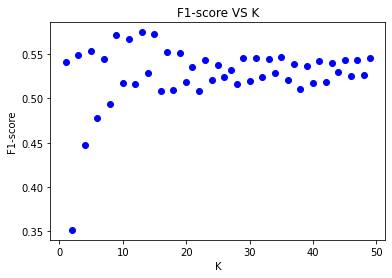

In [55]:
x = np.arange(1, 50)
# y_train = accuracy_Train
y_val = accuracy_Val
# plt.plot(x, y_train, color="skyblue")
plt.scatter(x, y_val, color="blue")
plt.title("F1-score VS K")
plt.ylabel('F1-score')
plt.xlabel('K')
plt.show()

In [33]:
y_pred = predict_KNN(Train[:,:20],Train[:,-1],Test[:,:20] , 12)
#Checking the accuracy
target_names = ['class 0', 'class 1']
GDA_classification_report=classification_report(Test[:,-1], y_pred, target_names=target_names)
print(GDA_classification_report)

              precision    recall  f1-score   support

     class 0       0.52      0.61      0.56       400
     class 1       0.52      0.42      0.47       400

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.52      0.51       800



In [122]:
confusion_matrix(Test[:,-1], y_pred)

array([[245, 155],
       [230, 170]], dtype=int64)

# 3.b)

In [172]:
report(GDA_classification_report,"DatasetsDS1/Assignment2_2134563_section1_sub-Question3_sub-sub-question-b_accuracy.txt")

In [35]:
mean_1_1 = np.genfromtxt('Datasets/DS2_c1_m1.txt',delimiter=',')
mean_1_2 = np.genfromtxt('Datasets/DS2_c1_m2.txt',delimiter=',')
mean_1_3 = np.genfromtxt('Datasets/DS2_c1_m3.txt',delimiter=',')
mean_1_1.shape

(20,)

In [36]:
mean_2_1 = np.genfromtxt('Datasets/DS2_c2_m1.txt',delimiter=',')
mean_2_2 = np.genfromtxt('Datasets/DS2_c2_m2.txt',delimiter=',')
mean_2_3 = np.genfromtxt('Datasets/DS2_c2_m3.txt',delimiter=',')
mean_2_1.shape

(20,)

In [48]:
Cov_M1 = np.genfromtxt('Datasets/DS2_Cov1.txt',delimiter=',')
Cov_M2 = np.genfromtxt('Datasets/DS2_Cov2.txt',delimiter=',')
Cov_M3 = np.genfromtxt('Datasets/DS2_Cov3.txt',delimiter=',')
Cov_M1.shape

(20, 20)

In [51]:
class_1 = np.concatenate((np.random.multivariate_normal(mean_1_1, Cov_M1, 200), np.random.multivariate_normal(mean_1_2, Cov_M2, 840), np.random.multivariate_normal(mean_1_3, Cov_M3, 960)))

In [53]:
class_2 = np.concatenate((np.random.multivariate_normal(mean_2_1, Cov_M1, 200), np.random.multivariate_normal(mean_2_2, Cov_M2, 840), np.random.multivariate_normal(mean_2_3, Cov_M3, 960)))

In [58]:
# Add an extract column to all the sample
N = 2000
DS2 = np.concatenate((np.c_[ class_1, np.ones(N) ] ,np.c_[ class_2, np.zeros(N) ]))
DS2.shape

(4000, 21)

In [133]:
class_P = np.c_[ class_1, np.ones(N) ]
class_N = np.c_[ class_2, np.zeros(N) ]

In [134]:
size = DS2.shape[0]*6/10
size_1 = class_P.shape[0]*6/10
size_2 = class_N.shape[0]*6/10

In [135]:
Train_DS2_P, Val_DS2_P, Test_DS2_P = class_P[:int(size_1),:], class_P[int(size_1):int(size_1)+400,:], class_P[int(size_1)+400:,:]
Train_DS2_P.shape, Val_DS2_P.shape, Test_DS2_P.shape

((1200, 21), (400, 21), (400, 21))

In [137]:
Train_DS2_N, Val_DS2_N, Test_DS2_N = class_N[:int(size_2),:], class_N[int(size_2):int(size_2)+400,:], class_N[int(size_2)+400:,:]
Train_DS2_N.shape, Val_DS2_N.shape, Test_DS2_N.shape

((1200, 21), (400, 21), (400, 21))

In [140]:
Test_DS2 = np.concatenate((Test_DS2_N, Test_DS2_P))
Val_DS2 = np.concatenate((Val_DS2_N, Val_DS2_P))
Train_DS2 = np.concatenate((Train_DS2_N,Train_DS2_P))

In [145]:
Train_DS2.shape, Val_DS2.shape, Test_DS2.shape

((2400, 21), (800, 21), (800, 21))

# 4

In [146]:
np.savetxt("DatasetsDS1/DS2_Test.csv", Test_DS2, delimiter=",")
np.savetxt("DatasetsDS1/DS2_Val.csv", Val_DS2, delimiter=",")
np.savetxt("DatasetsDS1/DS2_Train.csv", Train_DS2, delimiter=",")
np.savetxt("DatasetsDS1/DS2.csv", DS2, delimiter=",")

In [147]:
Test_DS2_N, Test_DS2_P = np.array_split(Test_DS2, 2)
Test_DS2_N.shape, Test_DS2_P.shape

((400, 21), (400, 21))

# 5.1b)

In [150]:
Parameter_WDS2, Parameter_W0DS2, sigmaDS2, phiDS2, mu_0DS2, mu_1DS2 = GDA_Parameter (Train_DS2)

In [174]:
Parameter_WDS2, Parameter_W0DS2, sigmaDS2, phiDS2, mu_0DS2, mu_1DS2

(array([-14.51089977,   8.53301869,   5.31942223,   3.065962  ,
          9.79150056,   4.5956817 , -16.86631745,  24.22450509,
         29.12842965,  -9.31624337,  13.20600686,  12.03573062,
        -15.3430904 , -12.93508174,   5.69320012, -13.07862723,
        -29.29098078,   6.82786823,   0.41861648,   4.99543732]),
 -27.051553944107543,
 array([[8.22133136, 5.76825745, 6.56167549, 5.5789665 , 6.20271166,
         6.5062709 , 4.97206   , 5.72150713, 5.30619931, 5.6871412 ,
         4.16196197, 5.48655254, 7.63174348, 6.2888247 , 6.51824858,
         6.4424403 , 6.14096207, 6.01331498, 5.87009845, 6.56196641],
        [5.76825745, 6.93961029, 5.62002449, 4.61998733, 5.73414022,
         5.75202171, 4.54263409, 4.07999252, 4.35219326, 5.2432717 ,
         3.55111305, 4.71567391, 6.20401893, 5.29692784, 5.7306298 ,
         5.46458785, 5.79120486, 5.25595873, 5.50202449, 5.76247059],
        [6.56167549, 5.62002449, 7.7378969 , 5.32534504, 6.14370613,
         6.93770383, 4.9032405 , 

In [166]:
report(pd.DataFrame(Parameter_WDS2).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_Patrameter_W.txt")
report(pd.DataFrame(Parameter_W0DS2.reshape(1,1)).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_Patrameter_W0.txt")
# phi.to_csv(r,"DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_phi.txt") 
# pd.DataFrame.to_csv("DatasetsDS1/Assignment2_2134563_section1_sub-Question2_sub-sub-question-b_phi.txt", phi, mode = 'float')
report(pd.DataFrame(sigmaDS2).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_sigma.txt")
report(phiDS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_phi.txt")
report(pd.DataFrame(mu_0DS2).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_mu_0.txt")
report(pd.DataFrame(mu_1DS2).to_string(),"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1b_mu_1.txt")

# 5.1a)

In [151]:
print(GDA_accuracy(Parameter_WDS2, Parameter_W0DS2, Test_DS2_P, Test_DS2_N))

(0.50625, 0.5070821529745042, 0.4475, 0.4754316069057105)


In [164]:
acc_DS2, pre_DS2, rec_DS2, f_DS2 = GDA_accuracy(Parameter_WDS2, Parameter_W0DS2, Test_DS2_P, Test_DS2_N)

In [165]:
report(acc_DS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1a_accuracy.txt")
report(pre_DS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1a_precision.txt")
report(rec_DS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1a_recall.txt")
report(f_DS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-1a_f_score.txt")

# 5.2)

In [152]:
Train_XDS2 = Train_DS2[:,:20]
Train_YDS2 = Train_DS2[:,-1]
Train_XVDS2 = Val_DS2[:,:20]
Train_YVDS2 = Val_DS2[:,-1]

In [153]:
accuracy_ValDS2 = []
accuracy_ValDS2 = tune_parameter(Train_XDS2, Train_YDS2, Train_XVDS2, Train_YVDS2, 50)

[]

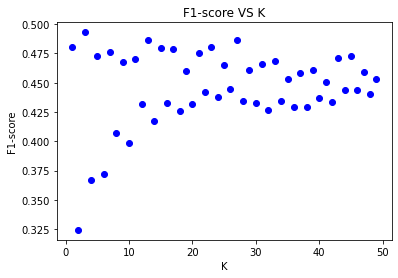

In [161]:
x_DS2 = np.arange(1, 50)
# y_train = accuracy_Train
y_val = accuracy_ValDS2
# plt.plot(x, y_train, color="skyblue")
plt.scatter(x_DS2, y_val, color="blue")
plt.title("F1-score VS K")
plt.ylabel('F1-score')
plt.xlabel('K')
plt.show()

# 5.3)

In [169]:
y_pred_DS2 = predict_KNN(Train_XDS2,Train_YDS2,Test_DS2[:,:20] , 3)
#Checking the accuracy
target_names = ['class 0', 'class 1']
GDA_classification_report_DS2=classification_report(Test_DS2[:,-1], y_pred_DS2, target_names=target_names)
print(GDA_classification_report)

              precision    recall  f1-score   support

     class 0       0.48      0.51      0.50       400
     class 1       0.48      0.46      0.47       400

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800



In [170]:
confusion_matrix(Test_DS2[:,-1], y_pred_DS2)

array([[204, 196],
       [217, 183]], dtype=int64)

In [173]:
report(GDA_classification_report_DS2,"DatasetsDS1/Assignment2_2134563_section1_sub-Question5_sub-sub-question-3_accuracy.txt")